<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision Object Detection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모입니다.
네트워크 통신을 위해서 requests 패키지를 import합니다


In [ ]:
import requests


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
import json

subscription key와 접속에 필요한 URL을 설정합니다.


In [ ]:
subscription_key = '265d4fca24264c56be6a97a6e1bfb4d4'
vision_base_url = 'https://labuser71computervision.cognitiveservices.azure.com/vision/v2.0/'


In [ ]:
analyze_url = vision_base_url + 'analyze'



분석에 사용되는 이미지를 확인합니다.

In [ ]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZOumqWpQQRd5zN2rMCqklCcPUgu5CJmEIKQ&usqp=CAU'


In [ ]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)
# image = image.open(BytesIO(requests.get(image_url).content))

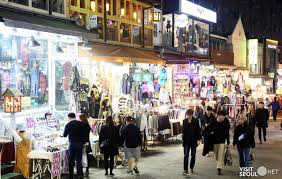

In [ ]:

image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(analyze_url,headers = headers,params = params, json = (data))


In [ ]:
result = response.json()

In [ ]:
result

{'categories': [{'name': 'outdoor_',
   'score': 0.01171875,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_street', 'score': 0.1328125, 'detail': {'landmarks': []}},
  {'name': 'people_crowd', 'score': 0.265625}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['White', 'Grey', 'Black'],
  'accentColor': '957136',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'street',
   'outdoor',
   'scene',
   'walking',
   'city',
   'people',
   'area',
   'store',
   'busy',
   'many',
   'group',
   'standing',
   'covered',
   'large',
   'clock',
   'crowded',
   'bus',
   'parked',
   'riding'],
  'captions': [{'text': 'a group of people walking down a street',
    'confidence': 0.9380140122351484}]},
 'requestId': 'a286b378-608d-4065-a108-06448e7ca1c3',
 'metadata': {'height': 179, 'width': 282, 'format': 'Jpeg'}}

In [ ]:
image_caption = result['description']['captions'][0]['text']

In [ ]:
image_caption

'a group of people walking down a street'

In [ ]:
image_url = 'https://image.ajunews.com/content/image/2020/07/10/20200710174752890555.jpg'

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

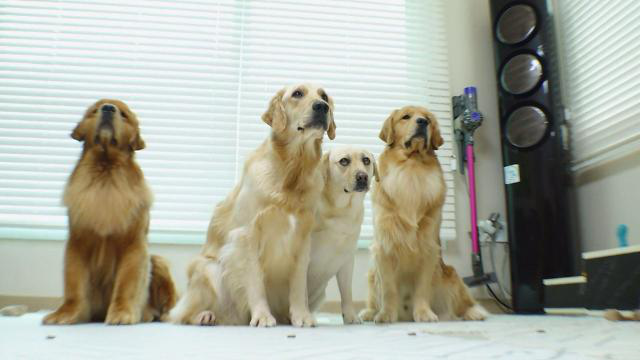

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(objectDetection_url,headers = headers, params = params, json = data)

In [ ]:
result = response.json()

In [ ]:
result

{'objects': [{'rectangle': {'x': 46, 'y': 89, 'w': 115, 'h': 242},
   'object': 'dog',
   'confidence': 0.825,
   'parent': {'object': 'mammal',
    'confidence': 0.884,
    'parent': {'object': 'animal', 'confidence': 0.885}}},
  {'rectangle': {'x': 366, 'y': 106, 'w': 129, 'h': 221},
   'object': 'golden retriever',
   'confidence': 0.619,
   'parent': {'object': 'retriever',
    'confidence': 0.739,
    'parent': {'object': 'dog',
     'confidence': 0.854,
     'parent': {'object': 'mammal',
      'confidence': 0.874,
      'parent': {'object': 'animal', 'confidence': 0.874}}}}},
  {'rectangle': {'x': 176, 'y': 77, 'w': 184, 'h': 252},
   'object': 'golden retriever',
   'confidence': 0.815,
   'parent': {'object': 'retriever',
    'confidence': 0.9,
    'parent': {'object': 'dog',
     'confidence': 0.91,
     'parent': {'object': 'mammal',
      'confidence': 0.914,
      'parent': {'object': 'animal', 'confidence': 0.914}}}}}],
 'requestId': '68b19bc4-05a2-4c0e-8b89-50068405f1aa'

In [ ]:
from PIL import Image, ImageDraw, ImageFont
draw = ImageDraw.Draw(image)

In [ ]:
#bounding box를 위한 함수
def DrawBox(detect_data):
  objects = detect_data['objects']
  for obj in objects:
    # print(obj)

    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline = 'red')

    obj_name = obj['object']
    draw.text((x,y),obj_name, fill = 'red')

In [ ]:
DrawBox(result)

{'x': 46, 'y': 89, 'w': 115, 'h': 242}
{'x': 366, 'y': 106, 'w': 129, 'h': 221}
{'x': 176, 'y': 77, 'w': 184, 'h': 252}


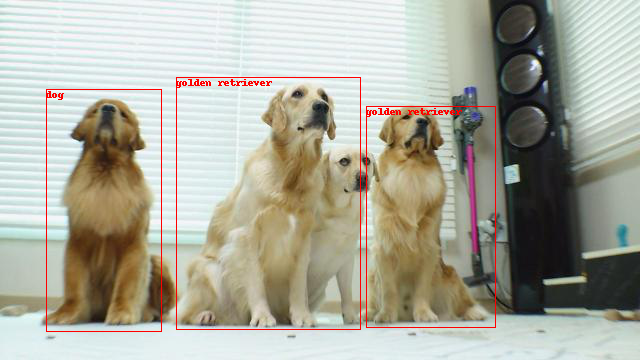

In [ ]:
image